Kundenanalyse mit KundenInsight Pro
Vorbereitungen

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Basis-URL der API
base_url = "http://127.0.0.1:8000"

# Alle Kunden abrufen
response = requests.get(f"{base_url}/customers/")
customers_df = pd.DataFrame(response.json())

Datenanalyse
1. Grundlegende Statistiken

In [3]:
# Überblick über die Daten
print(customers_df.describe())

# Durchschnittliche Ausgaben pro Kundengruppe
avg_spending = customers_df.groupby('gender')['total_spent'].mean()
print("\nDurchschnittliche Ausgaben nach Geschlecht:")
print(avg_spending)

       customer_id          age  purchase_history  total_spent
count  1000.000000  1000.000000       1000.000000  1000.000000
mean    500.500000    46.931000         10.273000  2472.228870
std     288.819436    17.188359          5.593904  1409.283152
min       1.000000    18.000000          1.000000   100.890000
25%     250.750000    31.750000          5.000000  1337.867500
50%     500.500000    48.000000         10.000000  2320.790000
75%     750.250000    62.000000         15.000000  3736.702500
max    1000.000000    75.000000         20.000000  4994.690000

Durchschnittliche Ausgaben nach Geschlecht:
gender
F    2439.558340
M    2509.070106
Name: total_spent, dtype: float64


2. Visualisierungen

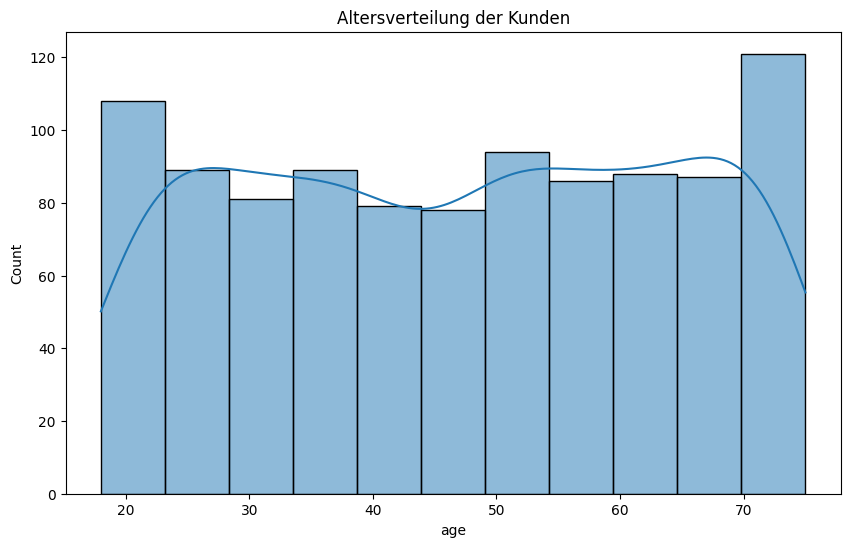

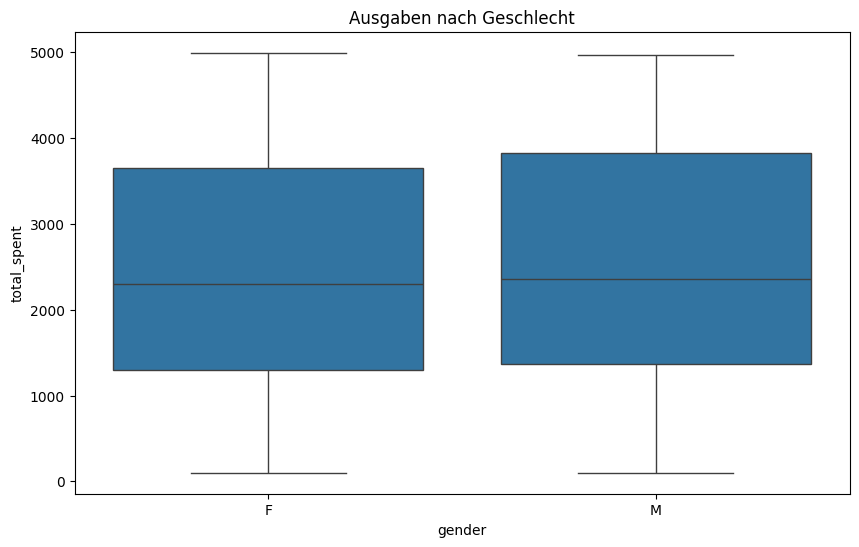

In [4]:
# Altersverteilung
plt.figure(figsize=(10, 6))
sns.histplot(data=customers_df, x='age', kde=True)
plt.title('Altersverteilung der Kunden')
plt.show()

# Boxplot der Ausgaben nach Altersgruppen
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='total_spent', data=customers_df)
plt.title('Ausgaben nach Geschlecht')
plt.show()

3. Kundenanalyse-Segmentierung

In [5]:
# Segmentierung nach Altersgruppen
age_segments = ['young', 'middle', 'senior']
for segment in age_segments:
    segment_response = requests.get(f"{base_url}/customers/segment/{segment}")
    segment_df = pd.DataFrame(segment_response.json())
    
    print(f"\n{segment.capitalize()} Segment Analyse:")
    print(f"Anzahl Kunden: {len(segment_df)}")
    print(f"Durchschnittliche Ausgaben: {segment_df['total_spent'].mean():.2f}")


Young Segment Analyse:
Anzahl Kunden: 212
Durchschnittliche Ausgaben: 2482.33

Middle Segment Analyse:
Anzahl Kunden: 312
Durchschnittliche Ausgaben: 2407.69

Senior Segment Analyse:
Anzahl Kunden: 476
Durchschnittliche Ausgaben: 2510.03
